In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
proj_dir = os.path.dirname(os.getcwd())
os.chdir(proj_dir)
from flow_analysis import Participant_Flow


In [2]:
par_num = 1
par = Participant_Flow(par_num)
exp_name = "n_back"
test_data = data = np.random.random(1000)

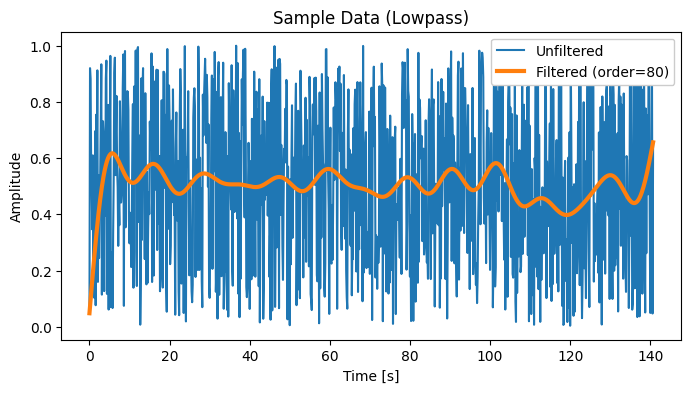

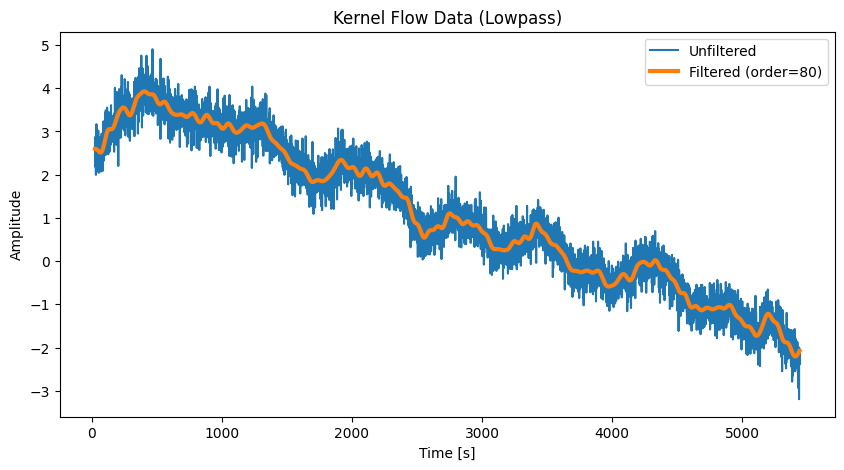

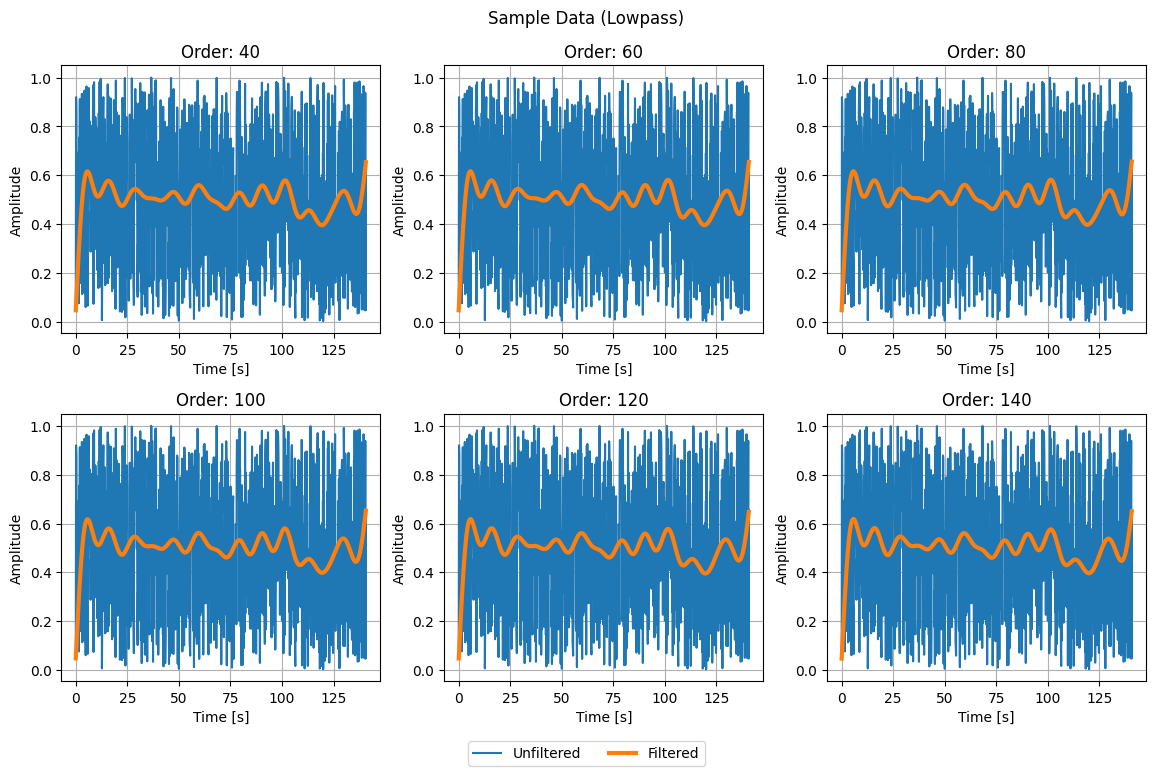

In [3]:
# lowpass filtering
cutoff = 0.1
fs = 7.1
order = 80

t = np.arange(len(data)) / fs
data_filt_sos = par.lowpass_filter(test_data, cutoff=cutoff, fs=fs, order=order, sos=True)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, test_data, label="Unfiltered")
ax.plot(t, data_filt_sos, label=f"Filtered (order={order})", linewidth=3)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.set_title("Sample Data (Lowpass)")
ax.legend(framealpha=1, loc="upper right")
plt.show()

# ---- uncomment to compare 'sos' and 'ba' ----
# data_filt_ba = par.lowpass_filter(test_data, cutoff=cutoff, fs=fs, order=order, sos=False)
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(t, test_data, label="Unfiltered")
# ax.plot(t, data_filt_ba, label=f"Filtered (order={order})", linewidth=3)
# ax.set_xlabel("Time [s]")
# ax.set_ylabel("Amplitude")
# ax.set_title("Sample Data (Lowpass)")
# ax.legend(framealpha=1, loc="upper right")
# plt.show()

flow_exp = par.load_flow_exp(exp_name)
flow_exp_data_only = flow_exp.iloc[:, 1:]
flow_exp_filtered = flow_exp_data_only.apply(lambda x: par.lowpass_filter(x, cutoff=cutoff, fs=fs, order=order, sos=True), axis=0)
col = 0
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(flow_exp_data_only[col], label="Unfiltered")
ax.plot(flow_exp_filtered[col], label=f"Filtered (order={order})", linewidth=3)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.legend()
ax.set_title(f"Kernel Flow Data (Lowpass)")
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
orders = [40, 60, 80, 100, 120, 140]
for i, ax in enumerate(axes.flat):
    order = orders[i]
    data_filt = par.lowpass_filter(data, order=order)
    ax.plot(t, test_data, label='Unfiltered')
    ax.plot(t, data_filt, label=f'Filtered (order={order})', linewidth=3)
    ax.set_title(f"Order: {order}")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid()
fig.suptitle("Sample Data (Lowpass)", y=0.95)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Unfiltered', 'Filtered'], loc='center', bbox_to_anchor=(0.5, 0.02), ncol=2)
plt.subplots_adjust(hspace=0.3)
plt.show()

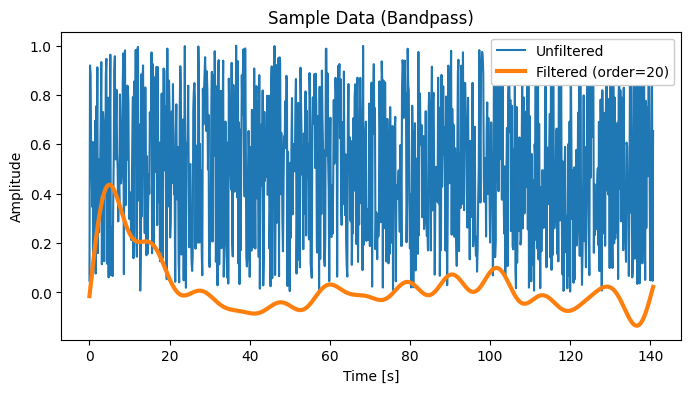

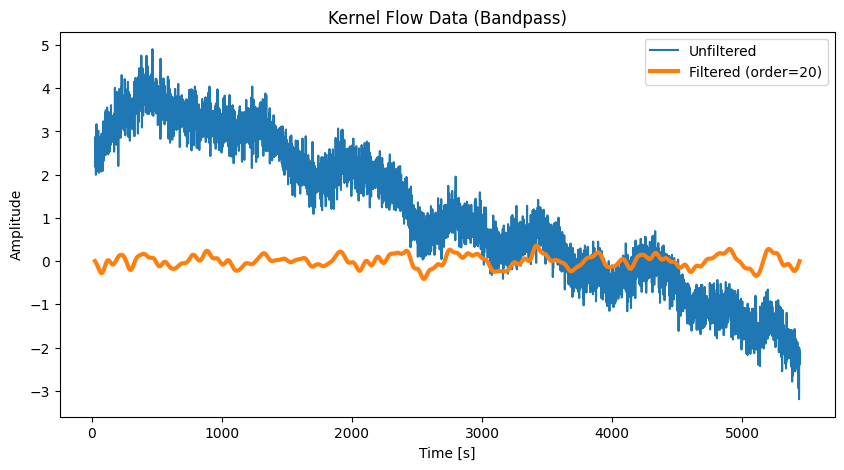

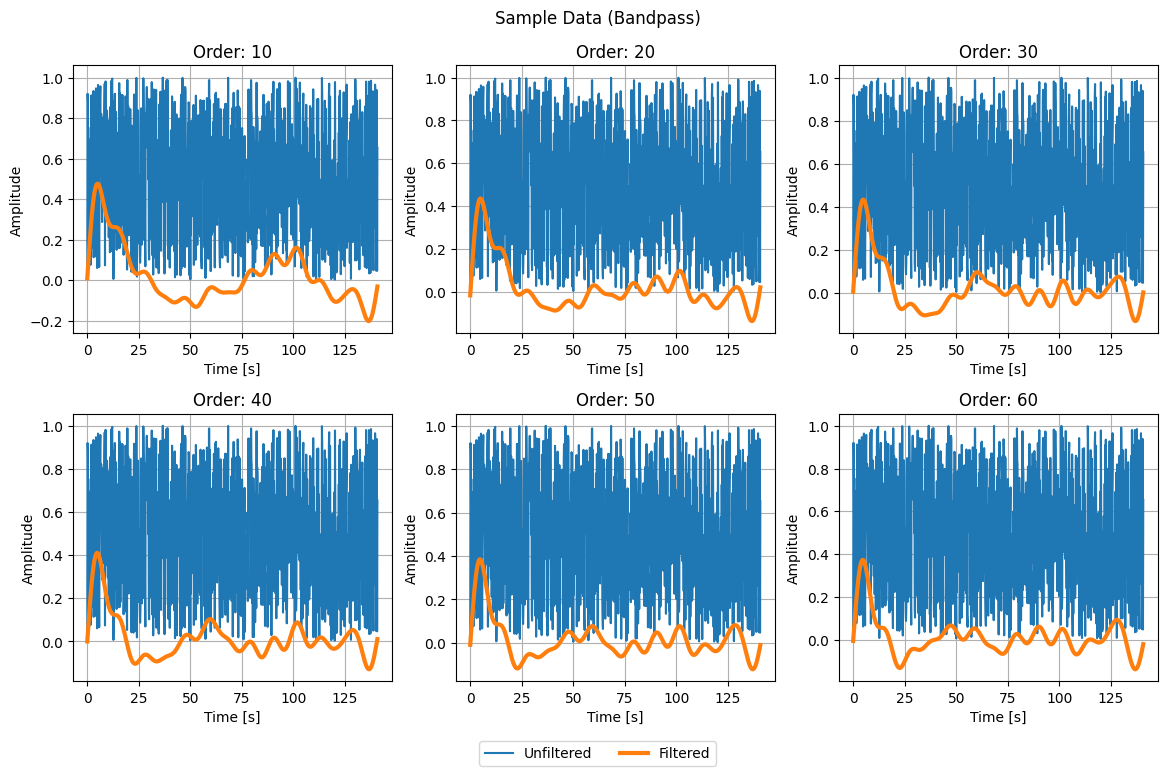

In [4]:
# bandpass filtering
cutoff_low = 0.01
cutoff_high = 0.1
fs = 7.1
order = 20

t = np.arange(len(data)) / fs
data_filt_sos = par.bandpass_filter(test_data, cutoff_low=cutoff_low, cutoff_high=cutoff_high, fs=fs, order=order, sos=True)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, test_data, label="Unfiltered")
ax.plot(t, data_filt_sos, label=f"Filtered (order={order})", linewidth=3)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.set_title("Sample Data (Bandpass)")
ax.legend(framealpha=1, loc="upper right")
plt.show()

# ---- uncomment to compare 'sos' and 'ba' ----
# data_filt_ba = par.bandpass_filter(test_data, cutoff_low=cutoff_low, cutoff_high=cutoff_high, fs=fs, order=order, sos=False)
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(t, test_data, label="Unfiltered")
# ax.plot(t, data_filt_ba, label=f"Filtered (order={order})", linewidth=3)
# ax.set_xlabel("Time [s]")
# ax.set_ylabel("Amplitude")
# ax.set_title("Sample Data (Bandpass)")
# ax.legend(framealpha=1, loc="upper right")
# plt.show()

flow_exp = par.load_flow_exp(exp_name)
flow_exp_data_only = flow_exp.iloc[:, 1:]
flow_exp_filtered = flow_exp_data_only.apply(lambda x: par.bandpass_filter(x, cutoff_low=cutoff_low, cutoff_high=cutoff_high, fs=fs, order=order, sos=True), axis=0)
col = 0
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(flow_exp_data_only[col], label="Unfiltered")
ax.plot(flow_exp_filtered[col], label=f"Filtered (order={order})", linewidth=3)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.legend()
ax.set_title(f"Kernel Flow Data (Bandpass)")
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
orders = [10, 20, 30, 40, 50, 60]
for i, ax in enumerate(axes.flat):
    order = orders[i]
    data_filt = par.bandpass_filter(data, order=order)
    ax.plot(t, test_data, label='Unfiltered')
    ax.plot(t, data_filt, label=f'Filtered (order={order})', linewidth=3)
    ax.set_title(f"Order: {order}")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid()
fig.suptitle("Sample Data (Bandpass)", y=0.95)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Unfiltered', 'Filtered'], loc='center', bbox_to_anchor=(0.5, 0.02), ncol=2)
plt.subplots_adjust(hspace=0.3)
plt.show()

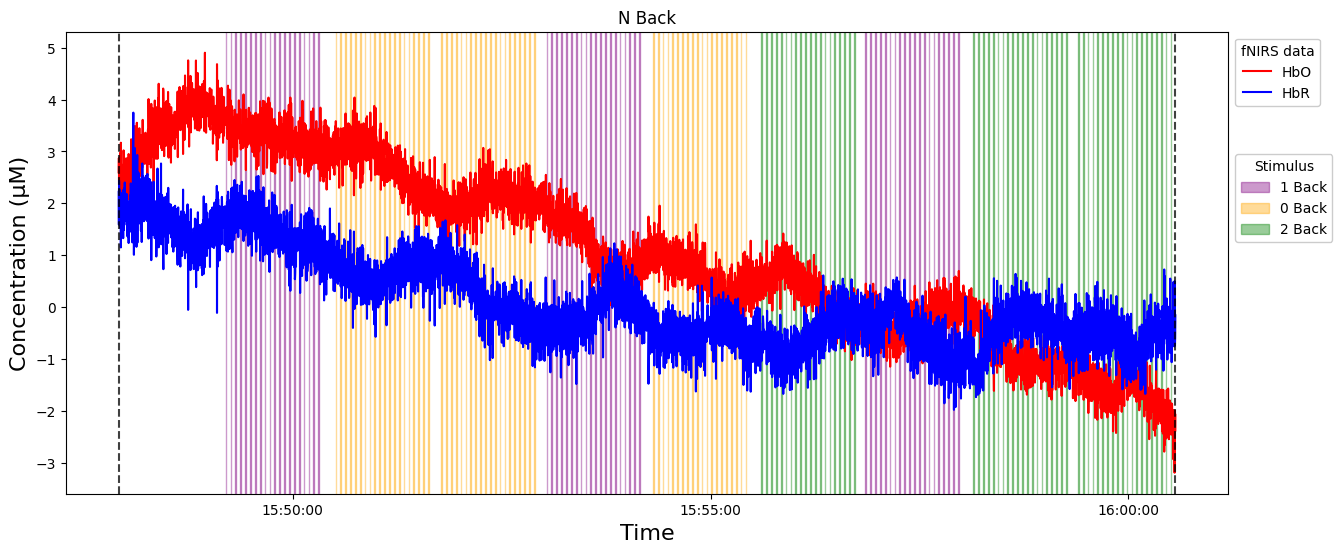

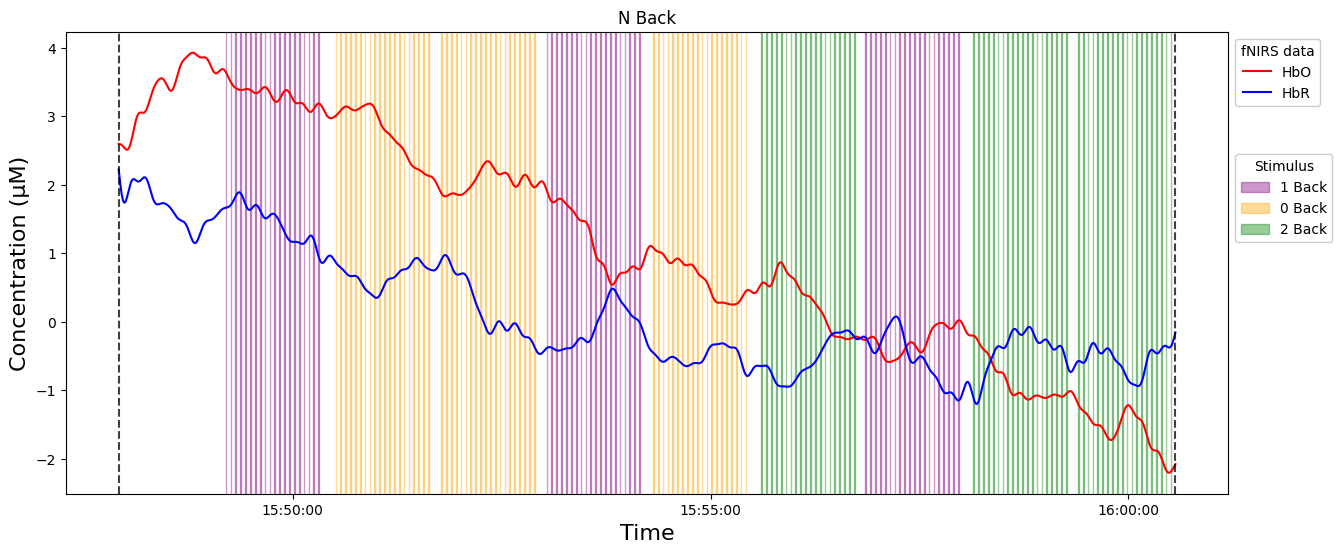

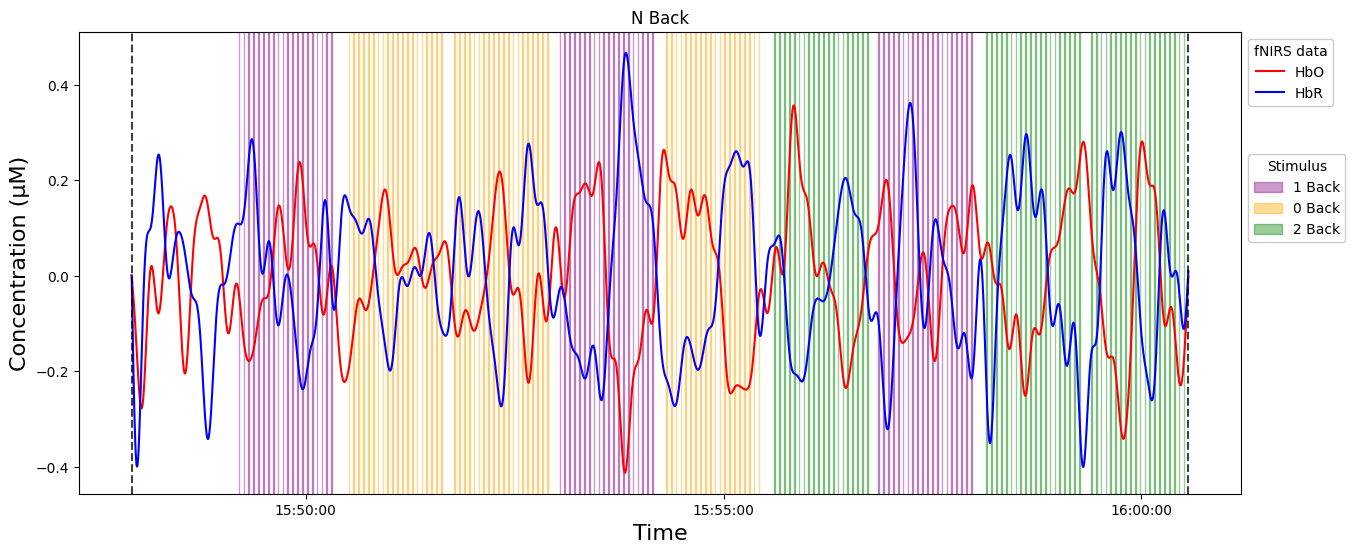

In [5]:
exp_name = "n_back"
par.plot_flow_exp(exp_name, channels=[0, 1])
par.plot_flow_exp(exp_name, filter_type="lowpass", filter_order=80, channels=[0, 1])
par.plot_flow_exp(exp_name, filter_type="bandpass", filter_order=20, channels=[0, 1])